In [9]:
#!pip install scikit-learn
#!pip install tensorflow
#!pip install tensorflow-gpu


In [10]:
import numpy as np

In [11]:
import random
import os
import numpy as np

crossValidationDataPaths=['NORMALIZED/NumericalData/ML/Training/RightHand','NORMALIZED/NumericalData/ML/Training/LeftHand']
testPaths=['NORMALIZED/NumericalData/ML/Test/RightHand','NORMALIZED/NumericalData/ML/Test/LeftHand']



ml_instances_paths=[]
for path in crossValidationDataPaths:
    #print(path)
    classFolders= os.listdir(path)
    for classFolder in classFolders:
        classFolder_path=f'{path}/{classFolder}'
        classTrials =os.listdir(classFolder_path)
        for trial in classTrials:
            trialPath =f'{classFolder_path}/{trial}'
            #print(trialPath)
            ml_instances_paths.append(trialPath)
            


#randomize the list
random.shuffle(ml_instances_paths)
#random.shuffle(ml_instances_paths)
#random.shuffle(ml_instances_paths)


x_shape =[]
y_shape =[]
for ml_instances_path in ml_instances_paths:
    label = ml_instances_path.split('/')
    label = label[len(label)-1].split('_')[0]
    #print(label)
    y_shape.append(int(label))
    npy =np.load(ml_instances_path)
    npy = npy*100
  
    npy_matrix=npy.reshape(-1,1629)
   
    # npy_matrix=extractPoseHand(npy)
    x_shape.append(npy_matrix)    

test_instances_paths=[]
for path in testPaths:
    #print(path)
    testFolders= os.listdir(path)
    for testFolder in testFolders:
        testFolder_path=f'{path}/{testFolder}'
        testTrials =os.listdir(testFolder_path)
        for trial in testTrials:
            trialPath =f'{testFolder_path}/{trial}'
            #print(trialPath)
            test_instances_paths.append(trialPath)


test_x_shape =[]
test_y_shape =[]
for test_instances_path in test_instances_paths:
    label = test_instances_path.split('/')
    label = label[len(label)-1].split('_')[0]
    #print(label)
    test_y_shape.append(int(label))
    npy =np.load(test_instances_path)
    npy=npy*100
    npy_matrix=npy.reshape(-1,1629)

    # npy_matrix=extractPoseHand(npy)
    
    test_x_shape.append(npy_matrix)    


In [12]:
# print(x_shape.shape)
# print(y_shape.shape)

In [13]:
# print(test_x_shape.shape)
# print(test_y_shape.shape)


In [14]:
print('hello')

hello


In [15]:
# training the total data
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense,Input,  Dropout, BatchNormalization, GRU, Attention,Concatenate, Conv1D, Masking, Embedding
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
import os

epochs = 200
batch_size = 32 # 64
NO_CLASSES = 60 #Changes according to no of class
MAX_FRMAE = 164

learning_rate = 0.00003
input_shape = (MAX_FRMAE,1629)



log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

print(y_shape)
#y_onehot = to_categorical(y_shape).astype(int)
label_encoder=LabelEncoder()
y_encoded =label_encoder.fit_transform(y_shape)
y_onehot =to_categorical(y_encoded,num_classes=NO_CLASSES)
print(len(y_onehot))



all_accuracies = []
x_shapeML = np.array(x_shape) #.astype(int)
x_train=x_shapeML
y_train =y_onehot

test_x_shapeML = np.array(test_x_shape) #.astype(int)
x_val=test_x_shapeML

#y_val = to_categorical(test_y_shape).astype(int)
y_encoded =label_encoder.fit_transform(test_y_shape)
y_val =to_categorical(y_encoded,num_classes=NO_CLASSES)


print('Train shape: ',x_train.shape, y_train.shape,'Test Shape: ', x_val.shape, y_val.shape)

[55, 11, 30, 51, 34, 24, 55, 40, 5, 58, 36, 11, 3, 50, 8, 25, 55, 51, 16, 53, 21, 16, 37, 3, 22, 58, 25, 37, 23, 12, 47, 29, 24, 51, 39, 57, 54, 15, 13, 53, 37, 37, 58, 19, 48, 6, 48, 30, 18, 59, 12, 54, 16, 16, 10, 8, 20, 14, 21, 20, 58, 33, 19, 58, 12, 33, 59, 2, 8, 17, 51, 50, 53, 36, 0, 5, 7, 58, 41, 8, 23, 15, 56, 29, 17, 4, 14, 32, 51, 32, 1, 26, 26, 2, 57, 35, 56, 58, 19, 11, 35, 42, 25, 17, 27, 18, 31, 51, 51, 39, 50, 38, 6, 41, 18, 57, 41, 13, 59, 6, 50, 2, 25, 20, 59, 56, 41, 15, 56, 46, 21, 59, 39, 12, 27, 51, 18, 57, 9, 32, 16, 59, 39, 30, 21, 40, 59, 40, 9, 6, 50, 8, 58, 57, 52, 43, 17, 46, 2, 39, 34, 50, 6, 32, 26, 6, 29, 13, 46, 24, 18, 12, 8, 16, 0, 36, 59, 8, 58, 32, 56, 52, 17, 3, 15, 24, 43, 22, 16, 14, 25, 38, 48, 45, 23, 10, 0, 33, 12, 51, 57, 11, 37, 56, 3, 36, 17, 48, 33, 12, 36, 49, 24, 8, 23, 22, 2, 4, 46, 21, 49, 15, 5, 55, 15, 51, 55, 52, 47, 6, 32, 31, 56, 45, 47, 52, 6, 17, 25, 29, 20, 40, 52, 36, 28, 44, 49, 54, 19, 55, 46, 48, 35, 50, 9, 53, 14, 55, 58, 4

In [16]:
import tensorflow as tf
import gc

# Define and compile the model


num_folds = 10
# Train the model
kfold = KFold(n_splits=num_folds, shuffle=True)


i = 1

all_accuracies = []
test_accuracies = []
conf_matrixes = []
bestTestAccuracy=0
bestTest=0

for train, test in kfold.split(x_train, y_train):

    input = Input(shape=input_shape)
    bd1 = Bidirectional(LSTM(units=64, return_sequences=True))(input)
    # bn1 = BatchNormalization()(bd1)
    bd11 = Dropout(0.3)(bd1)

    bd2 = Bidirectional(LSTM(units=64, return_sequences=True))(input)
    # bd22 = BatchNormalization()(bd2)

    att = Attention(use_scale=True)([bd2, bd11])

    merged = Concatenate(axis=-1)([bd2, att])

    flat = Flatten()(merged)
    dense = Dense(units=64, activation='silu')(flat)
    dp2 = Dropout(0.3)(dense)
    out = Dense(NO_CLASSES, activation='softmax')(dp2)
    
    model = Model(input, out)
    optimizer = Adam(learning_rate=learning_rate)
    # early_stoppage = EarlyStopping(monitor="loss",mode="auto", patience = 5,  restore_best_weights=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    
    print("---------------fold {} -----------".format(i))
    
    model.fit(x_train[train], y_train[train], epochs=epochs,  batch_size=batch_size, validation_data=(x_train[test],y_train[test]))

    # Evaluate the model on the validation set
    y_val_pred = model.predict(x_train[test])
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_train[test], axis=1)

        # Calculate accuracy for the fold
    test_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
    # all_accuracies.append(test_accuracy)
    all_accuracies.append(test_accuracy)
    # average_accuracy = np.mean(all_accuracies)


    ##avg_acc = all_accuracies/epochs

    print(f'Validation Accuracy Fold {i}: {test_accuracy}')



    # Evaluate the model on the test set
    y_val_pred = model.predict(x_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val, axis=1)
    test_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
    if test_accuracy >bestTestAccuracy:
        bestTestAccuracy=test_accuracy
        bestTest=i
    print(f'Test - Accuracy: {test_accuracy}')

    test_accuracies.append(test_accuracy)

    conf_mat = confusion_matrix(y_val_true_classes,y_val_pred_classes)

    conf_matrixes.append(conf_mat)
    i += 1
    tf.keras.backend.clear_session()
    del model
    gc.collect()
    


average_accuracy = np.mean(all_accuracies)
print("Average  cross validation accuracy: {average_accuracy}")



average_accuracy = np.mean(test_accuracies)
print("Average test accuracy: {average_accuracy}")






---------------fold 1 -----------
Epoch 1/200


W0000 00:00:1704200571.072918  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 4.0082 - accuracy: 0.0386

W0000 00:00:1704200619.324762  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 54s 216ms/step - loss: 4.0082 - accuracy: 0.0386 - val_loss: 3.8476 - val_accuracy: 0.0883
Epoch 2/200
226/226 [==============================] - 47s 208ms/step - loss: 3.8027 - accuracy: 0.0803 - val_loss: 3.7072 - val_accuracy: 0.1343
Epoch 3/200
226/226 [==============================] - 47s 208ms/step - loss: 3.6824 - accuracy: 0.1046 - val_loss: 3.5627 - val_accuracy: 0.1206
Epoch 4/200
226/226 [==============================] - 47s 209ms/step - loss: 3.5788 - accuracy: 0.1272 - val_loss: 3.4731 - val_accuracy: 0.1679
Epoch 5/200
226/226 [==============================] - 48s 211ms/step - loss: 3.4798 - accuracy: 0.1377 - val_loss: 3.3599 - val_accuracy: 0.1953
Epoch 6/200
226/226 [==============================] - 47s 209ms/step - loss: 3.3955 - accuracy: 0.1515 - val_loss: 3.2836 - val_accuracy: 0.2201
Epoch 7/200
226/226 [==============================] - 48s 212ms/step - loss: 3.3373 - accuracy: 0.1689 - val_loss: 3.2281 - val_accurac

W0000 00:00:1704209951.576681  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 3s 49ms/step
Validation Accuracy Fold 1: 0.8519900497512438
40/40 [==============================] - 2s 55ms/step
Test - Accuracy: 0.438871473354232
---------------fold 2 -----------
Epoch 1/200


W0000 00:00:1704209980.540830  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9511 - accuracy: 0.0523

W0000 00:00:1704210028.320614  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 53s 215ms/step - loss: 3.9511 - accuracy: 0.0523 - val_loss: 3.7115 - val_accuracy: 0.0897
Epoch 2/200
226/226 [==============================] - 47s 208ms/step - loss: 3.6899 - accuracy: 0.0998 - val_loss: 3.5677 - val_accuracy: 0.1345
Epoch 3/200
226/226 [==============================] - 47s 208ms/step - loss: 3.5816 - accuracy: 0.1148 - val_loss: 3.3846 - val_accuracy: 0.1930
Epoch 4/200
226/226 [==============================] - 47s 209ms/step - loss: 3.4692 - accuracy: 0.1425 - val_loss: 3.2596 - val_accuracy: 0.2105
Epoch 5/200
226/226 [==============================] - 47s 208ms/step - loss: 3.3678 - accuracy: 0.1562 - val_loss: 3.1833 - val_accuracy: 0.2677
Epoch 6/200
226/226 [==============================] - 47s 206ms/step - loss: 3.3023 - accuracy: 0.1706 - val_loss: 3.0453 - val_accuracy: 0.2690
Epoch 7/200
226/226 [==============================] - 47s 209ms/step - loss: 3.1813 - accuracy: 0.1992 - val_loss: 2.8726 - val_accurac

W0000 00:00:1704219357.744184  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 2s 54ms/step
Validation Accuracy Fold 2: 0.8941469489414695
40/40 [==============================] - 2s 56ms/step
Test - Accuracy: 0.3550156739811912
---------------fold 3 -----------
Epoch 1/200


W0000 00:00:1704219391.306123  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9675 - accuracy: 0.0558

W0000 00:00:1704219439.152240  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 53s 216ms/step - loss: 3.9675 - accuracy: 0.0558 - val_loss: 3.7520 - val_accuracy: 0.0934
Epoch 2/200
226/226 [==============================] - 47s 208ms/step - loss: 3.7047 - accuracy: 0.0985 - val_loss: 3.5514 - val_accuracy: 0.1270
Epoch 3/200
226/226 [==============================] - 47s 208ms/step - loss: 3.5660 - accuracy: 0.1241 - val_loss: 3.3823 - val_accuracy: 0.1868
Epoch 4/200
226/226 [==============================] - 47s 208ms/step - loss: 3.4454 - accuracy: 0.1451 - val_loss: 3.3323 - val_accuracy: 0.1831
Epoch 5/200
226/226 [==============================] - 47s 208ms/step - loss: 3.3330 - accuracy: 0.1746 - val_loss: 3.1735 - val_accuracy: 0.1930
Epoch 6/200
226/226 [==============================] - 47s 208ms/step - loss: 3.2596 - accuracy: 0.1799 - val_loss: 3.0461 - val_accuracy: 0.2453
Epoch 7/200
226/226 [==============================] - 47s 208ms/step - loss: 3.1269 - accuracy: 0.2071 - val_loss: 2.9368 - val_accurac

W0000 00:00:1704228764.748065  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 2s 53ms/step
Validation Accuracy Fold 3: 0.8430884184308842
40/40 [==============================] - 2s 54ms/step
Test - Accuracy: 0.3879310344827586
---------------fold 4 -----------
Epoch 1/200


W0000 00:00:1704228797.049626  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9597 - accuracy: 0.0558

W0000 00:00:1704228844.905419  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 53s 216ms/step - loss: 3.9597 - accuracy: 0.0558 - val_loss: 3.8061 - val_accuracy: 0.1059
Epoch 2/200
226/226 [==============================] - 47s 209ms/step - loss: 3.7390 - accuracy: 0.0901 - val_loss: 3.5763 - val_accuracy: 0.1557
Epoch 3/200
226/226 [==============================] - 47s 209ms/step - loss: 3.5760 - accuracy: 0.1343 - val_loss: 3.4433 - val_accuracy: 0.1768
Epoch 4/200
226/226 [==============================] - 47s 208ms/step - loss: 3.4404 - accuracy: 0.1533 - val_loss: 3.2420 - val_accuracy: 0.2267
Epoch 5/200
226/226 [==============================] - 47s 207ms/step - loss: 3.3514 - accuracy: 0.1646 - val_loss: 3.1401 - val_accuracy: 0.2428
Epoch 6/200
226/226 [==============================] - 47s 207ms/step - loss: 3.2428 - accuracy: 0.1819 - val_loss: 3.0229 - val_accuracy: 0.2603
Epoch 7/200
226/226 [==============================] - 47s 209ms/step - loss: 3.1031 - accuracy: 0.2108 - val_loss: 2.9549 - val_accurac

W0000 00:00:1704235596.034535  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 4: 0.8916562889165629
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.3432601880877743
---------------fold 5 -----------
Epoch 1/200


W0000 00:00:1704235609.865064  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9541 - accuracy: 0.0540

W0000 00:00:1704235642.201690  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 146ms/step - loss: 3.9541 - accuracy: 0.0540 - val_loss: 3.7845 - val_accuracy: 0.0984
Epoch 2/200
226/226 [==============================] - 32s 142ms/step - loss: 3.6989 - accuracy: 0.1060 - val_loss: 3.5085 - val_accuracy: 0.1594
Epoch 3/200
226/226 [==============================] - 32s 142ms/step - loss: 3.5146 - accuracy: 0.1428 - val_loss: 3.3398 - val_accuracy: 0.1955
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.3563 - accuracy: 0.1704 - val_loss: 3.1803 - val_accuracy: 0.2428
Epoch 5/200
226/226 [==============================] - 32s 142ms/step - loss: 3.2265 - accuracy: 0.1844 - val_loss: 3.0787 - val_accuracy: 0.2366
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1153 - accuracy: 0.2059 - val_loss: 3.0619 - val_accuracy: 0.2416
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 3.0298 - accuracy: 0.2266 - val_loss: 2.8837 - val_accurac

W0000 00:00:1704242044.251107  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 5: 0.8567870485678705
40/40 [==============================] - 2s 37ms/step
Test - Accuracy: 0.4177115987460815
---------------fold 6 -----------
Epoch 1/200


W0000 00:00:1704242058.071912  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9576 - accuracy: 0.0548

W0000 00:00:1704242090.308064  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 146ms/step - loss: 3.9576 - accuracy: 0.0548 - val_loss: 3.7443 - val_accuracy: 0.1320
Epoch 2/200
226/226 [==============================] - 32s 142ms/step - loss: 3.6767 - accuracy: 0.1132 - val_loss: 3.5173 - val_accuracy: 0.1519
Epoch 3/200
226/226 [==============================] - 32s 142ms/step - loss: 3.4780 - accuracy: 0.1403 - val_loss: 3.2873 - val_accuracy: 0.1955
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.3108 - accuracy: 0.1728 - val_loss: 3.1500 - val_accuracy: 0.2042
Epoch 5/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1839 - accuracy: 0.1976 - val_loss: 3.0683 - val_accuracy: 0.2528
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 3.0396 - accuracy: 0.2288 - val_loss: 2.8340 - val_accuracy: 0.3176
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 2.9321 - accuracy: 0.2449 - val_loss: 2.7501 - val_accurac

W0000 00:00:1704248490.015038  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 6: 0.8655043586550436
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.3722570532915361
---------------fold 7 -----------
Epoch 1/200


W0000 00:00:1704248503.649540  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9933 - accuracy: 0.0457

W0000 00:00:1704248535.970806  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 146ms/step - loss: 3.9933 - accuracy: 0.0457 - val_loss: 3.8048 - val_accuracy: 0.1009
Epoch 2/200
226/226 [==============================] - 32s 142ms/step - loss: 3.7585 - accuracy: 0.0894 - val_loss: 3.5873 - val_accuracy: 0.1544
Epoch 3/200
226/226 [==============================] - 32s 142ms/step - loss: 3.5574 - accuracy: 0.1278 - val_loss: 3.3474 - val_accuracy: 0.2092
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.4140 - accuracy: 0.1577 - val_loss: 3.2302 - val_accuracy: 0.1943
Epoch 5/200
226/226 [==============================] - 32s 142ms/step - loss: 3.3068 - accuracy: 0.1770 - val_loss: 3.2012 - val_accuracy: 0.2428
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 3.2001 - accuracy: 0.1969 - val_loss: 3.0856 - val_accuracy: 0.2516
Epoch 7/200
226/226 [==============================] - 32s 141ms/step - loss: 3.1389 - accuracy: 0.2102 - val_loss: 2.9524 - val_accurac

W0000 00:00:1704254929.761852  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 36ms/step
Validation Accuracy Fold 7: 0.8642590286425903
40/40 [==============================] - 2s 36ms/step
Test - Accuracy: 0.41849529780564265
---------------fold 8 -----------
Epoch 1/200


W0000 00:00:1704254942.093007  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9827 - accuracy: 0.0437

W0000 00:00:1704254974.788353  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 148ms/step - loss: 3.9827 - accuracy: 0.0437 - val_loss: 3.7747 - val_accuracy: 0.1021
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.7312 - accuracy: 0.0919 - val_loss: 3.5772 - val_accuracy: 0.1445
Epoch 3/200
226/226 [==============================] - 33s 145ms/step - loss: 3.5231 - accuracy: 0.1252 - val_loss: 3.4183 - val_accuracy: 0.1594
Epoch 4/200
226/226 [==============================] - 32s 143ms/step - loss: 3.3755 - accuracy: 0.1595 - val_loss: 3.2659 - val_accuracy: 0.2254
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 3.2405 - accuracy: 0.1893 - val_loss: 3.0901 - val_accuracy: 0.2516
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1261 - accuracy: 0.2132 - val_loss: 2.9233 - val_accuracy: 0.3163
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 2.9867 - accuracy: 0.2351 - val_loss: 2.8779 - val_accurac

W0000 00:00:1704261360.632295  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 8: 0.8405977584059776
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.4177115987460815
---------------fold 9 -----------
Epoch 1/200


W0000 00:00:1704261372.812505  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9406 - accuracy: 0.0569

W0000 00:00:1704261405.010290  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 146ms/step - loss: 3.9406 - accuracy: 0.0569 - val_loss: 3.7702 - val_accuracy: 0.0934
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.7137 - accuracy: 0.0963 - val_loss: 3.5345 - val_accuracy: 0.1831
Epoch 3/200
226/226 [==============================] - 32s 141ms/step - loss: 3.5556 - accuracy: 0.1305 - val_loss: 3.3764 - val_accuracy: 0.1968
Epoch 4/200
226/226 [==============================] - 32s 141ms/step - loss: 3.3889 - accuracy: 0.1620 - val_loss: 3.2833 - val_accuracy: 0.2017
Epoch 5/200
226/226 [==============================] - 32s 141ms/step - loss: 3.2808 - accuracy: 0.1785 - val_loss: 3.0831 - val_accuracy: 0.2503
Epoch 6/200
226/226 [==============================] - 32s 141ms/step - loss: 3.1820 - accuracy: 0.2028 - val_loss: 2.9424 - val_accuracy: 0.2777
Epoch 7/200
226/226 [==============================] - 32s 141ms/step - loss: 3.0736 - accuracy: 0.2263 - val_loss: 2.8453 - val_accurac

W0000 00:00:1704267770.280399  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 36ms/step
Validation Accuracy Fold 9: 0.9041095890410958
40/40 [==============================] - 1s 35ms/step
Test - Accuracy: 0.4615987460815047
---------------fold 10 -----------
Epoch 1/200


W0000 00:00:1704267782.660016  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9211 - accuracy: 0.0629

W0000 00:00:1704267814.895579  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 146ms/step - loss: 3.9211 - accuracy: 0.0629 - val_loss: 3.6828 - val_accuracy: 0.0909
Epoch 2/200
226/226 [==============================] - 32s 142ms/step - loss: 3.6113 - accuracy: 0.1168 - val_loss: 3.4722 - val_accuracy: 0.1806
Epoch 3/200
226/226 [==============================] - 32s 141ms/step - loss: 3.3988 - accuracy: 0.1568 - val_loss: 3.1850 - val_accuracy: 0.2117
Epoch 4/200
226/226 [==============================] - 32s 141ms/step - loss: 3.2232 - accuracy: 0.1959 - val_loss: 3.0403 - val_accuracy: 0.2628
Epoch 5/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1005 - accuracy: 0.2146 - val_loss: 2.9585 - val_accuracy: 0.2790
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 2.9808 - accuracy: 0.2308 - val_loss: 2.8404 - val_accuracy: 0.2964
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 2.8971 - accuracy: 0.2497 - val_loss: 2.6956 - val_accurac

W0000 00:00:1704274212.444368  744462 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 10: 0.8094645080946451
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.42476489028213166
Average  cross validation accuracy: {average_accuracy}
Average test accuracy: {average_accuracy}


In [17]:
print(test_accuracies)
print(np.average(test_accuracies))
print(all_accuracies)
print(np.average(all_accuracies))

[0.438871473354232, 0.3550156739811912, 0.3879310344827586, 0.3432601880877743, 0.4177115987460815, 0.3722570532915361, 0.41849529780564265, 0.4177115987460815, 0.4615987460815047, 0.42476489028213166]
0.4037617554858934
[0.8519900497512438, 0.8941469489414695, 0.8430884184308842, 0.8916562889165629, 0.8567870485678705, 0.8655043586550436, 0.8642590286425903, 0.8405977584059776, 0.9041095890410958, 0.8094645080946451]
0.8621603997447383


In [18]:
# print(conf_matrixes)

In [19]:
# average_conf_mat = np.sum(conf_matrixes, axis=0)
# average_conf_mat

test accuracies:  [0.438871473354232, 0.3550156739811912, 0.3879310344827586, 0.3432601880877743, 0.4177115987460815, 0.3722570532915361, 0.41849529780564265, 0.4177115987460815, 0.4615987460815047, 0.42476489028213166] 8
validation accuracies:  [0.8519900497512438, 0.8941469489414695, 0.8430884184308842, 0.8916562889165629, 0.8567870485678705, 0.8655043586550436, 0.8642590286425903, 0.8405977584059776, 0.9041095890410958, 0.8094645080946451]
60


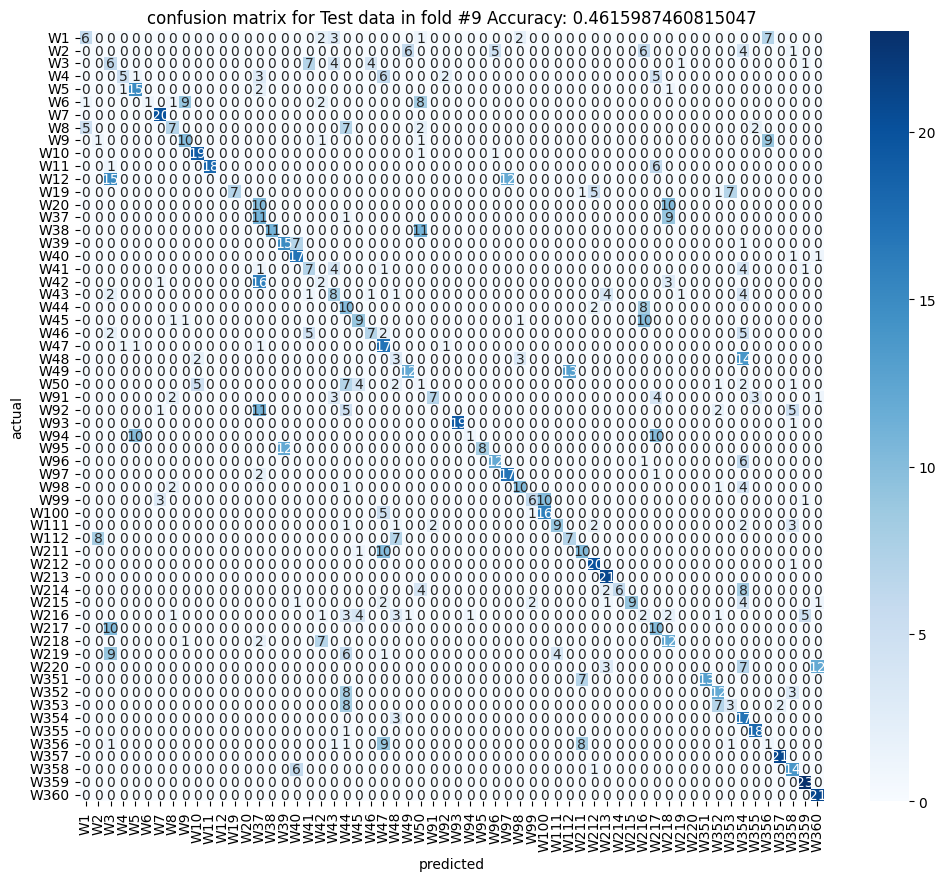

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat= conf_matrixes[bestTest-1]
print('test accuracies: ',test_accuracies, bestTest-1)
print ('validation accuracies: ',all_accuracies)
# average_conf_mat = np.mean(conf_matrixes, axis=0)
# for conf_matrix in conf_matrixes:
#     average_conf_mat +=  conf_matrix
# y_val_true_classes,y_val_pred_classes
ylabel =['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W19','W20','W37','W38','W39','W40','W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W91','W92','W93','W94','W95','W96','W97','W98','W99','W100','W111','W112','W211','W212','W213','W214','W215','W216','W217','W218','W219','W220','W351','W352','W353','W354','W355','W356','W357','W358','W359','W360']
print(len(ylabel))
# ticklabels=np.unique(y_val_true_classes)
plt.figure(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues',xticklabels=ylabel,yticklabels=ylabel)
plt.title(f'confusion matrix for Test data in fold #{bestTest} Accuracy: {test_accuracies[bestTest-1]}')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

plt.savefig(f'HandPose_RightHand_LeftHandFlipped_acc_{bestTest-1}_{test_accuracies[bestTest-1]}.png')

In [21]:
# print(y_val_pred.shape)
# print(y_val_pred)
# print(y_val_pred[0][10])

# bestTest-1

plt.close

<function matplotlib.pyplot.close(fig=None)>

In [22]:
# y_val_pred = model.predict(x_val)
# print(y_val_pred[0])
# y_val_pred_classes = np.argmax(y_val_pred, axis=1)
# y_val_true_classes = np.argmax(y_val, axis=1)

In [23]:
print('Hello')

Hello
